In [2]:
# Import dependencies

%matplotlib notebook

import requests
import os, glob
import geopy
import gmaps
from uszipcode import Zipcode
from uszipcode import SearchEngine
import scipy.stats as sts
import pandas as pd
import json
import numpy as np
from config import api_key
from pprint import pprint
from urllib.parse import quote
import matplotlib.pyplot as plt

In [3]:
# **STATISTICAL ANALYSIS**

# Reads in csv from master food truck data set.
df_hero = pd.read_csv('../Data_Collection_and_Cleanup/df_hero.csv').drop('Unnamed: 0', axis=1)
df_hero.head()


,name,review_count,rating,price,phone,display_phone,distance,lat,lng,zipcode,city,Median Home Value,Median Household Income,Population Density
0,Roaming Hunger,124,4.0,$$,1.800569e+10,(800) 568-9370,5878.967432,34.097384,-118.368360,90046,West Hollywood,873100.0,52641.0,8405.0
1,Prince of Venice Food Truck,65,4.0,$$,1.310615e+10,(310) 614-5443,9627.652417,34.033130,-118.438720,90064,Los Angeles,904200.0,84579.0,6350.0
2,Sam's Gourmet,30,4.0,$,1.323486e+10,(323) 485-8521,10179.680438,34.049835,-118.212746,90033,Los Angeles,291100.0,28005.0,14954.0
3,German's Catering Truck,41,5.0,$,1.213805e+10,(213) 804-5854,6263.058532,34.010762,-118.292093,90037,Los Angeles,271400.0,26796.0,21941.0
4,L.A Autentica Birrieria,120,5.0,$,1.323690e+10,(323) 690-0987,14746.067220,34.187151,-118.372929,91606,North Hollywood,363400.0,42521.0,13491.0


<IPython.core.display.Javascript object>


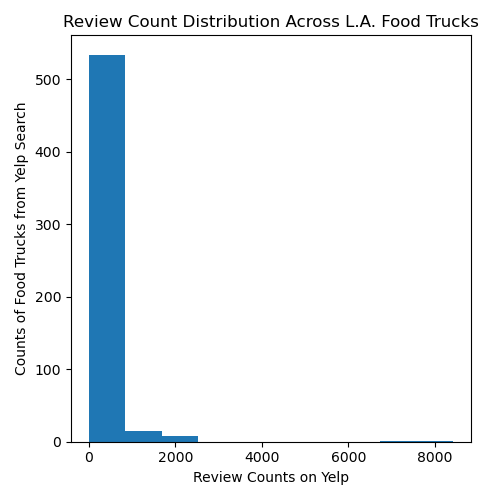

NormaltestResult(statistic=331.1705170116865, pvalue=1.2224636279400878e-72)


In [4]:
# Characterizes review counts across the data set using a histogram.

review_counts = df_hero['review_count']

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.hist(review_counts)
plt.xlabel('Review Counts on Yelp')
plt.ylabel('Counts of Food Trucks from Yelp Search')
ax1.set_title("Review Count Distribution Across L.A. Food Trucks")

fig1.tight_layout()

print(sts.normaltest(review_counts.sample(200)))

fig1.savefig("Review_Counts_Histogram_Total_Data_Set.png")

In [5]:
# Generates statistical summary of review counts across master food truck list.

print(f'''
Total Food Trucks in Sample: {len(review_counts)}
Mean Review Count: {np.mean(review_counts)}
Median Review Count: {np.median(review_counts)}
Mode Review Count: {sts.mode(review_counts)}
''')


Total Food Trucks in Sample: 559
Mean Review Count: 167.63148479427548
Median Review Count: 43.0
Mode Review Count: ModeResult(mode=array([2], dtype=int64), count=array([17]))



<IPython.core.display.Javascript object>


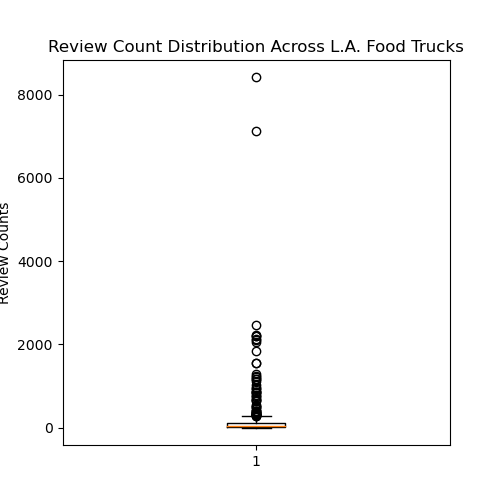

In [6]:
# Creates box and whisker plot visualizing review count distribution across food truck sample

fig2, ax2 = plt.subplots(figsize=(5,5))
ax2.boxplot(review_counts)
ax2.set_title('Review Count Distribution Across L.A. Food Trucks')
ax2.set_ylabel('Review Counts')

fig2.savefig("Review_Counts_BoxPlot_Total_Data_Set.png")


In [11]:
# Splits master list into two data frames - one "super" list for trucks with over 200 reviews,
#  and one "normal" list for trucks with under 200 reviews.

df_hero_normal_reviews = df_hero[df_hero['review_count'] < 200]

df_hero_super_reviews = df_hero[df_hero['review_count'] > 200]

df_hero_super_reviews.describe()



,review_count,rating,phone,distance,lat,lng,zipcode,Median Home Value,Median Household Income,Population Density
count,85.000000,85.000000,7.700000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,829.529412,4.035294,1.416715e+10,10286.976496,34.068432,-118.308354,90338.752941,510685.882353,45866.000000,13428.070588
std,1238.485650,0.492734,2.196305e+09,5484.868679,0.068480,0.095268,577.890147,210226.215547,19934.957828,6572.892970
min,203.000000,2.000000,1.213251e+10,1151.448624,33.889330,-118.518895,90001.000000,221500.000000,13415.000000,1665.000000
25%,254.000000,4.000000,1.310445e+10,6355.731028,34.029823,-118.377830,90015.000000,340500.000000,30171.000000,9618.000000
50%,361.000000,4.000000,1.323338e+10,9678.803774,34.058430,-118.278230,90031.000000,458300.000000,43078.000000,11383.000000
75%,903.000000,4.500000,1.480840e+10,13433.364841,34.097720,-118.246660,90291.000000,661700.000000,57630.000000,16402.000000
max,8414.000000,5.000000,1.949679e+10,29888.082990,34.312852,-118.092512,91776.000000,992700.000000,109922.000000,34761.000000


In [13]:
df_hero_normal_reviews.describe()

,review_count,rating,phone,distance,lat,lng,zipcode,Median Home Value,Median Household Income,Population Density
count,474.000000,474.000000,3.720000e+02,474.000000,474.000000,474.000000,474.000000,4.740000e+02,474.000000,474.000000
mean,48.936709,4.182489,1.459367e+10,11738.495318,34.056466,-118.305778,90315.172996,4.924682e+05,47853.786920,12928.270042
std,48.757980,0.583357,2.248741e+09,7538.552397,0.086899,0.108170,778.795448,2.182068e+05,23098.303658,7769.690294
min,1.000000,1.000000,1.203000e+10,1166.136985,33.727086,-118.605957,78704.000000,1.911000e+05,13415.000000,553.000000
25%,10.000000,4.000000,1.323201e+10,5941.793760,34.021771,-118.377303,90019.000000,3.163250e+05,30953.000000,8309.000000
50%,33.000000,4.500000,1.323609e+10,10753.606613,34.047730,-118.289786,90036.000000,4.291000e+05,42925.500000,11359.000000
75%,74.000000,4.500000,1.626818e+10,15220.572178,34.098168,-118.238875,90291.750000,6.173000e+05,59296.500000,16402.000000
max,199.000000,5.000000,1.928601e+10,48270.757188,34.380097,-117.938647,93010.000000,1.000001e+06,168036.000000,50810.000000


In [22]:
# Analyzes mean review counts and ratings by zipcodes, across food trucks with under 200 reviews


df_zipcode_means_under_200 = df_hero_normal_reviews.groupby('zipcode').mean()

df_sortedzipcode_means_under_200 = df_zipcode_means_under_200.sort_values(by=['review_count'], ascending=False)


<IPython.core.display.Javascript object>


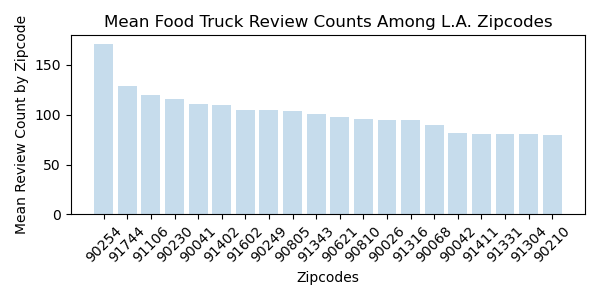

In [34]:
# Creates bar graph for vizualizing average review counts by zipcode

df_top_20_zip_codes = df_sortedzipcode_means_under_200.head(n=20)

df_top_20_zip_codes = top_20_zip_codes.reset_index()

# Prints output to CSV to create multiple line graph in excel
df_top_20_zip_codes.to_csv(f"./top_20_mean_review_counts_byzip.csv", index = False)



zipcodes = df_top_20_zip_codes['zipcode']

x_axis = np.arange(len(df_top_20_zip_codes['zipcode']))

mean_review_counts = df_top_20_zip_codes['review_count']

fig12, ax12 = plt.subplots(figsize=(6,3))
ax12.bar(x_axis, mean_review_counts, alpha = 0.25, align = "center")
ax12.set(xticks=list(x_axis),
      xticklabels=zipcodes,
       xlabel = "Zipcodes",
       ylabel= "Mean Review Count by Zipcode",
       title = "Mean Food Truck Review Counts Among L.A. Zipcodes")

for tick in ax12.get_xticklabels():
    tick.set_rotation(45)
    
fig12.tight_layout()
fig12.savefig("Top20FoodTruckZipcodesbyMeanReviews.png")

In [ ]:
# Create line graph comparing top average review count zipcodes and demographic features



<IPython.core.display.Javascript object>


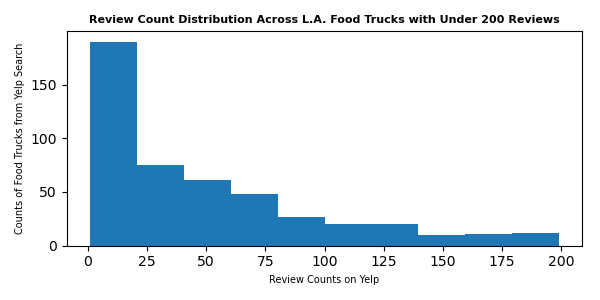

NormaltestResult(statistic=47.15589956429525, pvalue=5.7574014789300036e-11)


In [62]:
# Creates new histogram depicting review count distribution for "normal" food trucks

# Characterizes review counts across the data set using a histogram.

review_counts_norm = df_hero_normal_reviews['review_count']

fig3, ax3 = plt.subplots(figsize=(6,3))
ax3.hist(review_counts_norm)
plt.xlabel('Review Counts on Yelp', fontsize = 7)
plt.ylabel('Counts of Food Trucks from Yelp Search', fontsize = 7)
ax3.set_title("Review Count Distribution Across L.A. Food Trucks with Under 200 Reviews", fontsize=8, fontweight='bold')

fig3.tight_layout()

print(sts.normaltest(review_counts_norm.sample(200)))

fig3.savefig("Review_Counts_Histogram_Under200_Reviews.png")


In [43]:
# Generates statistical summary of review counts across "normally reviewed" food truck list.

print(f'''
Total Food Trucks in Sample: {len(review_counts_norm)}
Mean Review Count: {np.mean(review_counts_norm)}
Median Review Count: {np.median(review_counts_norm)}
Mode Review Count: {sts.mode(review_counts_norm)}
''')


Total Food Trucks in Sample: 474
Mean Review Count: 48.936708860759495
Median Review Count: 33.0
Mode Review Count: ModeResult(mode=array([2], dtype=int64), count=array([17]))



<IPython.core.display.Javascript object>


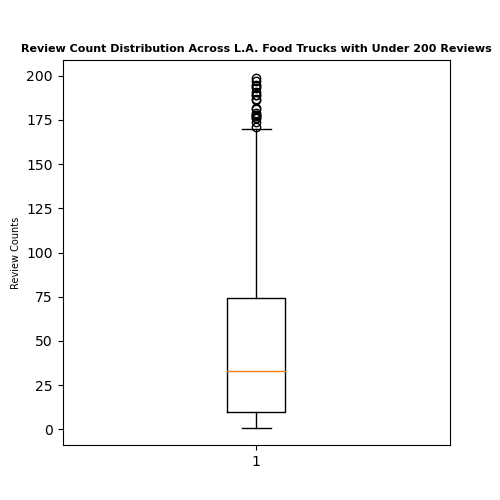

In [63]:
# Creates box and whisker plot visualizing review count distribution across food trucks with less than 200 reviews.

fig4, ax4 = plt.subplots(figsize=(5,5))
ax4.boxplot(review_counts_norm)
ax4.set_title('Review Count Distribution Across L.A. Food Trucks with Under 200 Reviews', fontsize = 8, fontweight='bold')
ax4.set_ylabel('Review Counts', fontsize = 7)

fig4.savefig("Review_Counts_BoxPlot_Under200_Reviews.png")

In [48]:
# **GEOGRAPHIC DISTRIBUTION ANALYSIS**


# Adds a new column for measuring food truck density by zipcode.
# Sort by zipcode.
df_sorted_hero = df_hero.sort_values(by = 'zipcode')

# Use groupby to count food trucks per zipcode.
ft_count = df_hero.groupby('zipcode')['name'].agg(['count'])
ft_count.reset_index(inplace=True)
ft_count



,zipcode,count
0,78704,1
1,90001,12
2,90002,3
3,90003,3
4,90004,1
...,...,...
132,91770,1
133,91776,2
134,92647,1
135,92805,1


In [51]:
# Creates new dataframe that includes density column.
df_density_hero = df_sorted_hero.merge(ft_count, how='left', on='zipcode')
df_density_hero = df_density_hero.rename(columns = {'count': "Food Truck Density"}).sort_values(by = "Food Truck Density", ascending = False)


# Filters list for zipcodes where Food Truck Density is greater than 5 food trucks per zipcode
df_density_hero_clean = df_density_hero[df_density_hero["Food Truck Density"] >= 5]
df_density_hero_clean


,name,review_count,rating,price,phone,display_phone,distance,lat,lng,zipcode,city,Median Home Value,Median Household Income,Population Density,Food Truck Density
111,Baby Lobster,51,3.0,$$,1.213747e+10,(213) 747-0605,6687.350022,34.038311,-118.254250,90015,Los Angeles,429100.0,27393.0,11100.0,28
108,Todoriko grill hot dogs,2,3.5,$,NaN,NaN,5471.805068,34.045670,-118.265182,90015,Los Angeles,429100.0,27393.0,11100.0,28
121,Mangia Italian Ristorante on Wheels,53,3.5,$,1.562400e+10,(562) 400-1946,5285.093632,34.041850,-118.269196,90015,Los Angeles,429100.0,27393.0,11100.0,28
120,Crispy Cuban,69,4.0,$,1.213272e+10,(213) 271-9381,4894.299838,34.044318,-118.272516,90015,Los Angeles,429100.0,27393.0,11100.0,28
119,Los Marcos Catering,1,5.0,$,NaN,NaN,5875.632650,34.036739,-118.265099,90015,Los Angeles,429100.0,27393.0,11100.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Comet BBQ,65,4.0,$,1.310572e+10,(310) 571-8255,1166.136985,34.066980,-118.299790,90020,Los Angeles,511800.0,38510.0,34475.0,5
317,Los Tacos Acosta,7,4.5,$,NaN,NaN,13844.717220,33.954600,-118.398205,90045,Los Angeles,661700.0,77893.0,3681.0,5
495,The Beignet Truck,106,4.5,$,1.888766e+10,(888) 765-5503,17204.094507,34.213185,-118.358760,91352,Sun Valley,338300.0,48844.0,4097.0,5
432,Thai Mex Cocina,42,4.0,$,1.310383e+10,(310) 382-7617,16332.952083,34.019457,-118.491193,90401,Santa Monica,676800.0,62794.0,7917.0,5


In [65]:
# Create a heat map of Food Truck Density using zipcodes with more than 5 trucks
locations = df_density_hero_clean[['lat', 'lng']].astype(float)
density = df_density_hero_clean['Food Truck Density']
fig7 = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=density, max_intensity=35,
                                point_radius=15)
fig7.add_layer(heat_layer)
fig7

Figure(layout=FigureLayout(height='420px'))

In [58]:
# Adds a marker layer to Food Truck Density Map to visualize the layout of food trucks with over 200 reviews

# Creates a new figure by duplicating the figure 7 heat map.
fig8 = gmaps.figure()
fig8.add_layer(heat_layer)

# Creates markers from the list of food trucks with over 200 reviews.
marker_locations = df_hero_super_reviews[['lat', 'lng']].astype(float)
markers = gmaps.marker_layer(marker_locations)
fig8.add_layer(markers)

# Creates info box template
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Reviews</dt><dd>{review_count}</dd>
</dl>"""
food_truck_info = [info_box_template.format(**row) for index, row in df_hero_super_reviews.iterrows()]
locations = df_hero_super_reviews[['lat', 'lng']]
symbol_layer = gmaps.marker_layer(locations, info_box_content=food_truck_info)
fig8.add_layer(symbol_layer)
fig8

Figure(layout=FigureLayout(height='420px'))

<IPython.core.display.Javascript object>


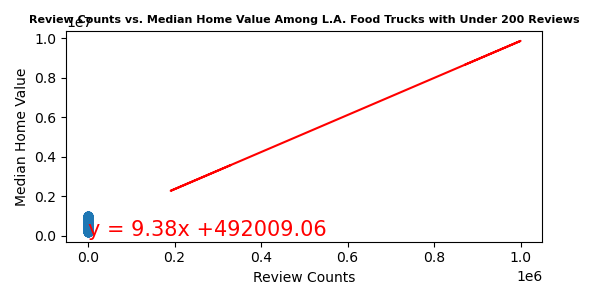

The r-value is 0.0.


In [79]:
# **LINEAR REGRESSION ANALYSIS**

# Isolates food trucks with under 200 reviews and compares location factors with review counts

# Creates figure for comparing median home value and review count

fig9, ax9 = plt.subplots(figsize=(6,3))
ax9.scatter(df_hero_normal_reviews["review_count"], df_hero_normal_reviews["Median Home Value"])
ax9.set(xlabel="Review Counts", ylabel="Median Home Value")
plt.title("Review Counts vs. Median Home Value Among L.A. Food Trucks with Under 200 Reviews", fontsize=8, fontweight = 'bold')

plt.tight_layout()

# Performs linear regression on latitude vs. temperature
(slope9, intercept9, rvalue9, pvalue9, stderr9) = sts.linregress(df_hero_normal_reviews["review_count"], df_hero_normal_reviews["Median Home Value"])

# Gets regression values and plots regression line with line equation
regress_values9 = df_hero_normal_reviews["Median Home Value"] * slope9 + intercept9

line_eq9 = "y = " + str(round(slope9,2)) + "x +" + str(round(intercept9,2))

plt.plot(df_hero_normal_reviews["Median Home Value"], regress_values9, "r-")
plt.annotate(line_eq9, (.2,.8), fontsize=15, color="red")

fig9.savefig("ReviewCountsVsMedianHomeValue.png")

print(f"The r-value is {str(round(rvalue9,2))}.")

<IPython.core.display.Javascript object>


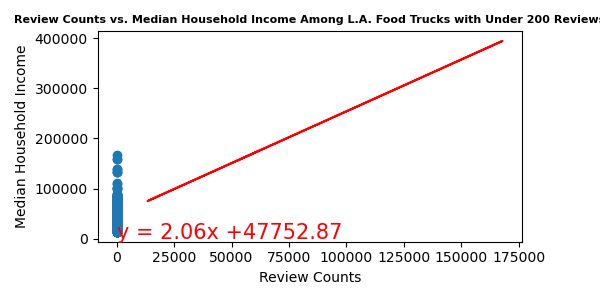

The r-value is 0.0.


In [80]:
# Creates figure for comparing median household income and review count

fig10, ax10 = plt.subplots(figsize=(6,3))
ax10.scatter(df_hero_normal_reviews["review_count"], df_hero_normal_reviews["Median Household Income"])
ax10.set(xlabel="Review Counts", ylabel="Median Household Income")
plt.title("Review Counts vs. Median Household Income Among L.A. Food Trucks with Under 200 Reviews", fontsize=8, fontweight = 'bold')

plt.tight_layout()

# Performs linear regression on latitude vs. temperature
(slope10, intercept10, rvalue10, pvalue10, stderr10) = sts.linregress(df_hero_normal_reviews["review_count"], df_hero_normal_reviews["Median Household Income"])

# Gets regression values and plots regression line with line equation
regress_values10 = df_hero_normal_reviews["Median Household Income"] * slope10 + intercept10

line_eq10 = "y = " + str(round(slope10,2)) + "x +" + str(round(intercept10,2))

plt.plot(df_hero_normal_reviews["Median Household Income"], regress_values10, "r-")
plt.annotate(line_eq10, (.2,.8), fontsize=15, color="red")

fig10.savefig("ReviewCountsVsMedianHouseholdIncome.png")

print(f"The r-value is {str(round(rvalue10,2))}.")

<IPython.core.display.Javascript object>


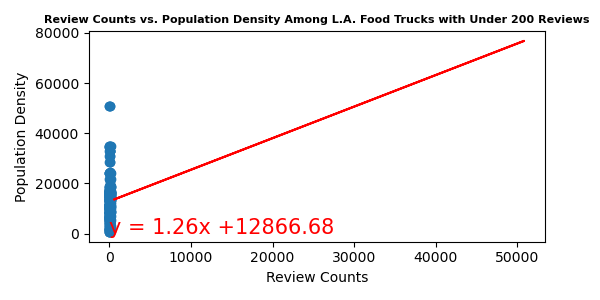

The r-value is 0.01.


In [81]:
# Creates figure for comparing population density and review count

fig11, ax11 = plt.subplots(figsize=(6,3))
ax11.scatter(df_hero_normal_reviews["review_count"], df_hero_normal_reviews["Population Density"])
ax11.set(xlabel="Review Counts", ylabel="Population Density")
plt.title("Review Counts vs. Population Density Among L.A. Food Trucks with Under 200 Reviews", fontsize=8, fontweight = 'bold')

plt.tight_layout()

# Performs linear regression on latitude vs. temperature
(slope11, intercept11, rvalue11, pvalue11, stderr11) = sts.linregress(df_hero_normal_reviews["review_count"], df_hero_normal_reviews["Population Density"])

# Gets regression values and plots regression line with line equation
regress_values11 = df_hero_normal_reviews["Population Density"] * slope11 + intercept11

line_eq11 = "y = " + str(round(slope11,2)) + "x +" + str(round(intercept11,2))

plt.plot(df_hero_normal_reviews["Population Density"], regress_values11, "r-")
plt.annotate(line_eq11, (.2,.8), fontsize=15, color="red")

fig11.savefig("ReviewCountsVsPopulationDensity.png")

print(f"The r-value is {str(round(rvalue11,2))}.")

In [36]:
df_top_50_zip_codes = df_sortedzipcode_means_under_200.head(n=50)

df_top_50_zip_codes



,review_count,rating,phone,distance,lat,lng,Median Home Value,Median Household Income,Population Density
zipcode,,,,,,,,,
90254,171.000000,3.000000,1.310600e+10,23308.986411,33.862946,-118.394997,1000001.0,101655.0,13665.0
91744,129.000000,5.000000,1.626677e+10,35370.423570,34.036675,-117.938647,285900.0,57291.0,9675.0
91106,120.000000,4.500000,NaN,20918.522289,34.150268,-118.121245,559000.0,66250.0,8210.0
90230,116.000000,4.750000,1.374079e+10,10893.268261,34.003346,-118.415955,556700.0,71235.0,7048.0
90041,110.333333,4.333333,1.286761e+10,13675.957022,34.139476,-118.206451,535500.0,63770.0,7595.0
91402,109.500000,4.250000,1.818389e+10,23734.922732,34.229504,-118.479699,279100.0,40186.0,18733.0
91602,105.000000,4.750000,1.323734e+10,10518.441018,34.146000,-118.370622,600000.0,66652.0,8535.0
90249,104.500000,4.250000,1.310494e+10,17884.667515,33.899165,-118.324389,354200.0,51871.0,8956.0
90805,104.000000,3.500000,1.562661e+10,25111.710702,33.874370,-118.169030,282000.0,44070.0,12692.0
